# State Machines in Python - Part 2

In this part, we have a closer look at a (simple) user interface to control our state machine, and discover more features of STMPY.

In [1]:
from stmpy import Machine, Driver

import ipywidgets as widgets
from IPython.display import display


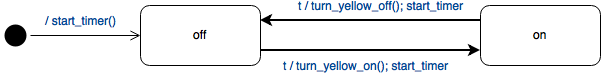

## Signal Light

We create a blinking light. As basis, we use the code below that offers a simple user interface in Python Notebooks. 

Have a look at the class below. It displays an image and two buttons. In addition, it prepares the action we need for the state machine.

In [2]:
class SignalLight:
    
    def on_button_switch(self, b):
        self.stm.send_signal('switch') # <---- here we send a signal
        
    def on_button_terminate(self, b):
        self.stm.driver.stop() # <---- here we stop the driver
    
    def __init__(self):
        # load images and store them
        self.yellow_on = open("images/yellow_on.png", "rb").read()
        self.yellow_off = open("images/yellow_off.png", "rb").read()
        
        # display the user interface
        # a button
        self.button_switch = widgets.Button(description="Send Signal 'switch'")
        self.button_switch.on_click(self.on_button_switch)
        # another button
        self.button_terminate = widgets.Button(description="Stop the Driver")
        self.button_terminate.on_click(self.on_button_terminate)
        # an image of a yellow light
        self.yellow = widgets.Image(value=self.yellow_off, format='png', width=50, height=50)
        # display everything
        display(self.yellow, self.button_switch, self.button_terminate)
        
    def turn_yellow_on(self):
        # switch on the yellow light
        self.yellow.set_trait(name='value', value=self.yellow_on)
        
    def turn_yellow_off(self):
        # switch off the yellow light
        self.yellow.set_trait(name='value', value=self.yellow_off)
        
    def start_timer(self):
        # start the timer
        self.stm.start_timer('t', 1000)
        
        

We declare the state machine using three transitions. As you can see, the effects on the transitions can refer to several methods, separated with a `;`.

Run the cell below. You should see a blinking light. It stops when you click on the `Stop the Driver` button. To restart it, just run the cell again.

In [3]:
signal = SignalLight()

t0 = {'source': 'initial',
      'effect': 'start_timer',
      'target': 'off'}
t1 = {'trigger':'t',
      'source':'off',
      'target':'on',
      'effect':'turn_yellow_on; start_timer'}
t2 = {'trigger':'t', 
      'source':'on', 
      'target':'off', 
      'effect':'turn_yellow_off; start_timer'}

machine = Machine(name='signal', transitions=[t0, t1, t2], obj=signal)
signal.stm = machine

driver = Driver()
driver.add_machine(machine)
driver.start()



Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00P\x00\x00\x00P\x08\x02\x00\x00\x00\x01se\xfa\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\tpHYs\x00\x00\x04\x9d\x00\x00\x04\x9d\x01|4k\xa1\x00\x00\x02\x0biTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 5.4.0">\n   <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n      <rdf:Description rdf:about=""\n            xmlns:tiff="http://ns.adobe.com/tiff/1.0/">\n         <tiff:ResolutionUnit>2</tiff:ResolutionUnit>\n         <tiff:Compression>5</tiff:Compression>\n         <tiff:Orientation>1</tiff:Orientation>\n         <tiff:PhotometricInterpretation>2</tiff:PhotometricInterpretation>\n      </rdf:Description>\n   </rdf:RDF>\n</x:xmpmeta>\n\x86\xd2\xae$\x00\x00\x04\x00IDATx\x01\xedZ]o\xd40\x10\x8c\xed\x84V\xb4\x02\x84\xa0\x05\x01\x12\xe2\x91\xd7\xfb\xff\xff\x83\xa7\x16\t\x84J\x11\x15\x05\x818\xeel3\xe7TQ\xd4\xdcAfm\xe7\x9a\xbb\xdc\x0b\xa9\xd9\xf5\xccx\x13\x7f\xed\xaa\xd9lV\xec\xd3O\xef\x93\xd8\x95\xd6I\xf0\xaeG|\x8a\xf0\x14\xe1\x1d\x1b\x81\xe9\x95\xde\xb1\x80v\xe4L\x11\xee\x0c\xc9\x8e5L\x11\xde\xb1\x80v\xe4L\x11\xee\x0c\xc9\x8e5\x94\x83\xe8qJ\xfd\xd2\xea\xa7R\xbf\x95\x9a\xab\xc2\x16\xca\xaep\xbd\xf1\x85\xf1\xfe\xc0\xfbC\xe7\x8f\xbc\xbf?\xc0a&\xab`\xa7\xf57\xa3\xaf\xb4\xfa\xae\x94_3\xb2\xaan\xfbQ\xff\xe3\xbdr\xfe\x81u\x8f\x9d{\x94Oy&\xc1\x8b\xd2\\\x1a\xfdE\xd5\x91\\\xa3uM\x13\x06\xc5\xa8k\xa3\xaf\xbd7\xd6=]\xda\x93\xa2\xa8\xd6\xd8\xc55%\x17\xec\x8c\xfe\\\x9a\x0b\xa5\x9c\x98\x18\x86\t=\x18}\xb9\xb4\xcf\xac;M\x1b\xed\x94\x82\xf1\xa1V\xe5\x99Vs\xb1\xd4\xb6#\x86\xac*?\x19\xffu\xb1|\x13>\xef\xf6\x7f\xca\x9f\x93-K\x08\xc8\xbd\xf2]*\xb5\x8d t\x88n\xd1y\xd3\x12\xf9\x90$\xc2\xbe4\x1f\xf1\xd1FR\xd9\xe4\x8eo\xbb*?(;_\xda\x97Eq3\xd1m2\xfeo{|\x84}e\xde\xe7S\xdb\x08\x00\x04\x80\xb0\x945-\xb2\x87X\xc1\x88\xad1W2l\xd6\x0b@\x80c\xbdn\xd9G\t\xc6\xa75@l\xdb\x8c\x01\x17\xf9=\xcb\x05cN\x8e\x1f\xef\xb6\x98\x9e\xcf\x00\x05tO\xe3\xae\x99X0\xd6\x8c\xb3\xf5\xfb\xa7.H\xd2\x960\x87\x9d\x15\x85p\x9d\x17\n\xc6\xee"\xf9\n\xd4\x7fX\x00\r\x02\xfd\xed\xdb\x962\xc1\xd89^\xb4{\x19\xfe9\x10X\x08p%\x821s\xc4\xec\x1c\x05,\xbb.  \x9b/\x05\x82-N\x05]\x06\xc3\xb7\x04\x1a\xe1\x98\xc9`\xd3\x82\xb5\xbe\xa6\xce@\x0c\x19\xce\x164@\x86\xf3\x11\x1cDp\xbee1\xf2\xd9\x0b\xc8\xb0\x11v8\xcd\xe7\x13\xc0\xf6\x1c\xc8p\xeb\x13\'\x18+\xfeV\xd6\xdeM\x03\x012\xec&\x84\x13\x8c{\xa9M\xd8\xdbjg)q\x82q\x0b\xb7-a\x9bpYJ\xac\xe04\xb7\x19\x9b\xd8\x0b\xdaq\rJy\x91\x82q\xc3z\xc7~\xabK_\xe6\xc7\t\xbe\xb9Of\x00\xb2\xdb2\x17\xa3 C\n\xceN?;\x00)\xd8\x9b\xec\x8cX\x00\x92\x12\'\x18\x99\x11\x96On{\x96\x12)\xd8\x1f\xe4\x16\xc0\xf6\x8f\xd4\x14\xe5\xc2\n>\xa4z\x1f\xc0\x18\x898\n\x85\x13\x8c\x1c\x1f\xd5\xfb\x00\xc6,%N0R\x1e\xc8\xf1\r \xa3\'\x04\xc8\xb0Y\x18N0\x961d4{\xb2\x19\xc0,\x90\xe1$p\xd6\xd0\x80\xfc\xed\x00JzB\x08\xc8\xd0\x82\x9d{\x88\xfcmOBY\xcd@#\xa4\xce9\x10ZpQ\xac\xb2\xd5\x1cH\x1e\xeb@\x83\xe6O;\x80<r\xf3\xdeK\x1c\x13\n\x07\x81P"@w)\xe3]!7OC%u\x08\x04$\x05\x112\xc1\x98\xbaN\x1d\xb9\xc5I\xa8\x17\xd0\xa1\x14B\xd2\xa5P0\xd6\xa7P\x89\xb0\x855\x19k/\xa0\xc5\xe7<\xb1\xe0\x02+~H\xc9K\x869\xc6\x07\xa0\xecf\xa3\r\'\x17\x8c^\xac;\x91\xcd\x1cm\x06\xd43\xe0\x00J\xb9\xdc2\x8e\x12\x8c\xbe0\xde\xd6\x0e\xb4\x15\x01P\xfc;\x15+\x18U&\x0b\xfbz\x808\x03\x02@\xf1E-I\xaax\xd4\xd2\xbe\xc2\xb94\xe4\xe6c\x8bNn\xbd\x81\xf8\x13\xb3\xd4\xea=\x8a{\x93\x9bn\x93\x08^\xf5\x06B8\xa9U\xe5y\xdaD9V\xa0\xb4\x85i\xc9\x04\x87P\x1c\xfdY\xbc\x8d/=\xac\xa3\x11\xf6Rw\xbb\xf40\x10\xd5\xd6=\xb7\xeeI(\xb7\xe1\x8aKk\x9da\xe0\xc6T\\Z\xd3\xc6\xde\xf3\x05v\x7f\xc8\xdf\xfe\xab|\xb8\x91\x18\x1e\xf0\xad\x8e\xb7|\xb8\x96\x82\xe3\x1b\x8a\x9f\xb1h\xedK\x81x\x13A\xed\xfd\xb1\xf5\xc7\xcd\xdf[|\x88_\x87\xb7H^\x02=\t\x96\x8c\xda\x98|\xa6\x08\x8f)Z\x12\xaeS\x84%\xa36&\x9f)\xc2c\x8a\x96\x84\xeb\x14a\xc9\xa8\x8d\xc9g\x8a\xf0\x98\xa2%\xe1\xbaw\x11\xfe\x0briUk#\x99_j\x00\x00\x00\x00IEND\xaeB`\x82', height='50', width='50')

Button(description="Send Signal 'switch'", style=ButtonStyle())

Button(description='Stop the Driver', style=ButtonStyle())

## Sending Signals

So far, the state machines were controlled by timers. We can also trigger the state machine by signals. The signals can come from different sources --- hardware, software interrrupts, received messages, or, as here, clicks on a user interfaces.

The button `Send Signal switch` was not yet used in the example. Have a look again at the SignalLight class. When this button is pressed, a signal `switch` is sent to the state machine. (Actually, its driver.) We can usew this signal to trigger the transition, so we have a manual signal light.

Execute the cell below. Nothing should happen, until you press the button `Send Signal switch`.

In [4]:
signal_2 = SignalLight()

t0 = {'source': 'initial',
      'target': 'off'}
t1 = {'trigger':'switch',
      'source':'off',
      'target':'on',
      'effect':'turn_yellow_on'}
t2 = {'trigger':'switch', 
      'source':'on', 
      'target':'off', 
      'effect':'turn_yellow_off'}

machine_2 = Machine(name='signal_2', transitions=[t0, t1, t2], obj=signal_2)
signal_2.stm = machine_2

driver_2 = Driver()
driver_2.add_machine(machine_2)
driver_2.start()


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00P\x00\x00\x00P\x08\x02\x00\x00\x00\x01se\xfa\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\tpHYs\x00\x00\x04\x9d\x00\x00\x04\x9d\x01|4k\xa1\x00\x00\x02\x0biTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 5.4.0">\n   <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n      <rdf:Description rdf:about=""\n            xmlns:tiff="http://ns.adobe.com/tiff/1.0/">\n         <tiff:ResolutionUnit>2</tiff:ResolutionUnit>\n         <tiff:Compression>5</tiff:Compression>\n         <tiff:Orientation>1</tiff:Orientation>\n         <tiff:PhotometricInterpretation>2</tiff:PhotometricInterpretation>\n      </rdf:Description>\n   </rdf:RDF>\n</x:xmpmeta>\n\x86\xd2\xae$\x00\x00\x04\x00IDATx\x01\xedZ]o\xd40\x10\x8c\xed\x84V\xb4\x02\x84\xa0\x05\x01\x12\xe2\x91\xd7\xfb\xff\xff\x83\xa7\x16\t\x84J\x11\x15\x05\x818\xeel3\xe7TQ\xd4\xdcAfm\xe7\x9a\xbb\xdc\x0b\xa9\xd9\xf5\xccx\x13\x7f\xed\xaa\xd9lV\xec\xd3O\xef\x93\xd8\x95\xd6I\xf0\xaeG|\x8a\xf0\x14\xe1\x1d\x1b\x81\xe9\x95\xde\xb1\x80v\xe4L\x11\xee\x0c\xc9\x8e5L\x11\xde\xb1\x80v\xe4L\x11\xee\x0c\xc9\x8e5\x94\x83\xe8qJ\xfd\xd2\xea\xa7R\xbf\x95\x9a\xab\xc2\x16\xca\xaep\xbd\xf1\x85\xf1\xfe\xc0\xfbC\xe7\x8f\xbc\xbf?\xc0a&\xab`\xa7\xf57\xa3\xaf\xb4\xfa\xae\x94_3\xb2\xaan\xfbQ\xff\xe3\xbdr\xfe\x81u\x8f\x9d{\x94Oy&\xc1\x8b\xd2\\\x1a\xfdE\xd5\x91\\\xa3uM\x13\x06\xc5\xa8k\xa3\xaf\xbd7\xd6=]\xda\x93\xa2\xa8\xd6\xd8\xc55%\x17\xec\x8c\xfe\\\x9a\x0b\xa5\x9c\x98\x18\x86\t=\x18}\xb9\xb4\xcf\xac;M\x1b\xed\x94\x82\xf1\xa1V\xe5\x99Vs\xb1\xd4\xb6#\x86\xac*?\x19\xffu\xb1|\x13>\xef\xf6\x7f\xca\x9f\x93-K\x08\xc8\xbd\xf2]*\xb5\x8d t\x88n\xd1y\xd3\x12\xf9\x90$\xc2\xbe4\x1f\xf1\xd1FR\xd9\xe4\x8eo\xbb*?(;_\xda\x97Eq3\xd1m2\xfeo{|\x84}e\xde\xe7S\xdb\x08\x00\x04\x80\xb0\x945-\xb2\x87X\xc1\x88\xad1W2l\xd6\x0b@\x80c\xbdn\xd9G\t\xc6\xa75@l\xdb\x8c\x01\x17\xf9=\xcb\x05cN\x8e\x1f\xef\xb6\x98\x9e\xcf\x00\x05tO\xe3\xae\x99X0\xd6\x8c\xb3\xf5\xfb\xa7.H\xd2\x960\x87\x9d\x15\x85p\x9d\x17\n\xc6\xee"\xf9\n\xd4\x7fX\x00\r\x02\xfd\xed\xdb\x962\xc1\xd89^\xb4{\x19\xfe9\x10X\x08p%\x821s\xc4\xec\x1c\x05,\xbb.  \x9b/\x05\x82-N\x05]\x06\xc3\xb7\x04\x1a\xe1\x98\xc9`\xd3\x82\xb5\xbe\xa6\xce@\x0c\x19\xce\x164@\x86\xf3\x11\x1cDp\xbee1\xf2\xd9\x0b\xc8\xb0\x11v8\xcd\xe7\x13\xc0\xf6\x1c\xc8p\xeb\x13\'\x18+\xfeV\xd6\xdeM\x03\x012\xec&\x84\x13\x8c{\xa9M\xd8\xdbjg)q\x82q\x0b\xb7-a\x9bpYJ\xac\xe04\xb7\x19\x9b\xd8\x0b\xdaq\rJy\x91\x82q\xc3z\xc7~\xabK_\xe6\xc7\t\xbe\xb9Of\x00\xb2\xdb2\x17\xa3 C\n\xceN?;\x00)\xd8\x9b\xec\x8cX\x00\x92\x12\'\x18\x99\x11\x96On{\x96\x12)\xd8\x1f\xe4\x16\xc0\xf6\x8f\xd4\x14\xe5\xc2\n>\xa4z\x1f\xc0\x18\x898\n\x85\x13\x8c\x1c\x1f\xd5\xfb\x00\xc6,%N0R\x1e\xc8\xf1\r \xa3\'\x04\xc8\xb0Y\x18N0\x961d4{\xb2\x19\xc0,\x90\xe1$p\xd6\xd0\x80\xfc\xed\x00JzB\x08\xc8\xd0\x82\x9d{\x88\xfcmOBY\xcd@#\xa4\xce9\x10ZpQ\xac\xb2\xd5\x1cH\x1e\xeb@\x83\xe6O;\x80<r\xf3\xdeK\x1c\x13\n\x07\x81P"@w)\xe3]!7OC%u\x08\x04$\x05\x112\xc1\x98\xbaN\x1d\xb9\xc5I\xa8\x17\xd0\xa1\x14B\xd2\xa5P0\xd6\xa7P\x89\xb0\x855\x19k/\xa0\xc5\xe7<\xb1\xe0\x02+~H\xc9K\x869\xc6\x07\xa0\xecf\xa3\r\'\x17\x8c^\xac;\x91\xcd\x1cm\x06\xd43\xe0\x00J\xb9\xdc2\x8e\x12\x8c\xbe0\xde\xd6\x0e\xb4\x15\x01P\xfc;\x15+\x18U&\x0b\xfbz\x808\x03\x02@\xf1E-I\xaax\xd4\xd2\xbe\xc2\xb94\xe4\xe6c\x8bNn\xbd\x81\xf8\x13\xb3\xd4\xea=\x8a{\x93\x9bn\x93\x08^\xf5\x06B8\xa9U\xe5y\xdaD9V\xa0\xb4\x85i\xc9\x04\x87P\x1c\xfdY\xbc\x8d/=\xac\xa3\x11\xf6Rw\xbb\xf40\x10\xd5\xd6=\xb7\xeeI(\xb7\xe1\x8aKk\x9da\xe0\xc6T\\Z\xd3\xc6\xde\xf3\x05v\x7f\xc8\xdf\xfe\xab|\xb8\x91\x18\x1e\xf0\xad\x8e\xb7|\xb8\x96\x82\xe3\x1b\x8a\x9f\xb1h\xedK\x81x\x13A\xed\xfd\xb1\xf5\xc7\xcd\xdf[|\x88_\x87\xb7H^\x02=\t\x96\x8c\xda\x98|\xa6\x08\x8f)Z\x12\xaeS\x84%\xa36&\x9f)\xc2c\x8a\x96\x84\xeb\x14a\xc9\xa8\x8d\xc9g\x8a\xf0\x98\xa2%\xe1\xbaw\x11\xfe\x0briUk#\x99_j\x00\x00\x00\x00IEND\xaeB`\x82', height='50', width='50')

Button(description="Send Signal 'switch'", style=ButtonStyle())

Button(description='Stop the Driver', style=ButtonStyle())

If you press the `Stop the Driver` button, the driver will stop and your signals will not be forwarded to the state machine anymore. Restart the cell to start over again.